# Perceptron

A perceptron is a binary classification model. It is used to distinguish two classes of linearly seperable points. The algorithm works by finding a hyperplane that can be placed between the two classes. It takes in input features and multiplies them by weights. The weighted inputs are then summed with an added bias. The output is the result of running an activation function on the weighted sum. 

The algorithm requires a set of training data, a learning rate hyperparameter, and an activation function.

## The algorithm

## Initialization

The weights of each feature and the bias must be initialized. Some models initialize at zero for all and some use random values. Generally the bias is represented by adding a feature to all points that is always one. This means that the weight for that feature is the bias.

## Training

The weights and bias are trained on each training sample.



In [82]:
import numpy as np
from typing import Callable

class Preceptron:
    """A Preceptron is a single layer neural network that can be used for binary classification."""
    def __init__(self, input_size: int, activation: Callable[[np.ndarray], np.ndarray]) -> None:
        """Initialize the Preceptron."""
        # Initialize the weights to zeros with an extra weight for the bias.
        self.W = np.zeros(input_size+1)
        self.activation = activation

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict the output for the given input.
        
        Args:
            X: The input data.
            
        Returns:
            The predicted output."""
        # Check if the input is a single sample or a batch of samples.
        if X.ndim == 1:
            X = X.reshape(1, -1)
        # Add a column of ones to the data for the bias.
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return self.activation(X @ self.W)

    def fit(self, X: np.ndarray, y: np.ndarray, max_epochs: int = 100, lr: float = 0.5) -> None:
        """Fit the model to the given data.
        
        Args:
            X: The input data.
            y: The target output.
            max_epochs: The number of epochs to train for.
            lr: The learning rate.
        """
        # Add a column of ones to the data for the bias.
        X = np.c_[np.ones((X.shape[0], 1)), X]

        epochs = 0
        old_weights = None
        while not np.all(self.W == old_weights) and epochs < max_epochs:
            old_weights = self.W.copy()
            epochs += 1
            for i in range(X.shape[0]):
                y_pred = self.activation(X[i] @ self.W)
                self.W += lr * (y[i] - y_pred) * X[i]

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate the accuracy of the model on the given data.
        
        Args:
            X: The input data.
            y: The target output.
            
        Returns:
            The accuracy of the model.
        """
        return np.mean(self.predict(X) == y)

## Activation functions

Below are a few common activation functions. They all have various strengths and weaknesses. The step function is commonly used for single-layer preceptrons while sigmoid is often used for multilayer-preceptrons that use gradient descent.

In [83]:
def step(x: np.ndarray) -> np.ndarray:
    """The step activation function."""
    return (x >= 0).astype(int)

def sigmoid(x: np.ndarray) -> np.ndarray:
    """The sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def tanh(x: np.ndarray) -> np.ndarray:
    """The tanh activation function."""
    return np.tanh(x)

def relu(x: np.ndarray) -> np.ndarray:
    """The relu activation function."""
    return np.maximum(0, x)

def leaky_relu(x: np.ndarray) -> np.ndarray:
    """The leaky relu activation function."""
    return np.maximum(0.01 * x, x)

def elu(x: np.ndarray) -> np.ndarray:
    """The elu activation function."""
    return np.where(x < 0, np.exp(x) - 1, x)

## Data

The functions below generate two types of data. One is linearly seperable which is prefect for preceptrons. The other is non-linearly seperable which cannot be classified with a preceptron.

In [84]:
def generate_data_ls() -> np.ndarray:
    """Generate data for a linearly separable problem.
    
    The positive class is labeled 1 and the negative class is labeled 0."""
    X = np.random.uniform(-1, 1, size=(100, 2))
    y = np.zeros(100)
    y[X[:, 0] + X[:, 1] > 0] = 1
    return X, y

def generate_data_nls() -> np.ndarray:
    """Generate data for a non-linearly separable problem.
    
    The data is two concentric circles."""
    X = np.random.uniform(-1, 1, size=(100, 2))
    y = np.sign(np.sqrt(X[:, 0]**2 + X[:, 1]**2) - 0.5)
    return X, y

## Demonstration

In [85]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot_decision_boundary(model: Preceptron, X: np.ndarray, y: np.ndarray) -> None:
    """Plot the decision boundary of the model.
    
    Args:
        model: The model to plot the decision boundary for.
        X: The input data.
        y: The target output.
    """
    # Create a meshgrid of the input space.
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    # Predict the output for the meshgrid.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the decision boundary.
    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()
    

### Linearly seperable data

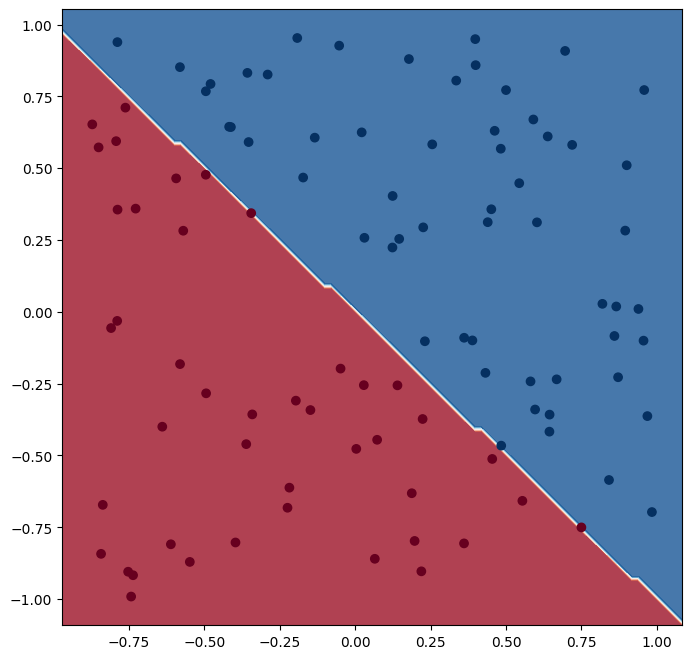

Accuracy: 1.00


In [86]:
# Generate data for a linearly separable problem.
X, y = generate_data_ls()

# Create a preceptron with the step activation function.
preceptron = Preceptron(2, step)

# Fit the model to the data.
preceptron.fit(X, y, max_epochs=1000, lr=0.5)

# Plot the data and the decision boundary.
plot_decision_boundary(preceptron, X, y)

# Score the model on the data.
print(f"Accuracy: {preceptron.score(X, y):.2f}")

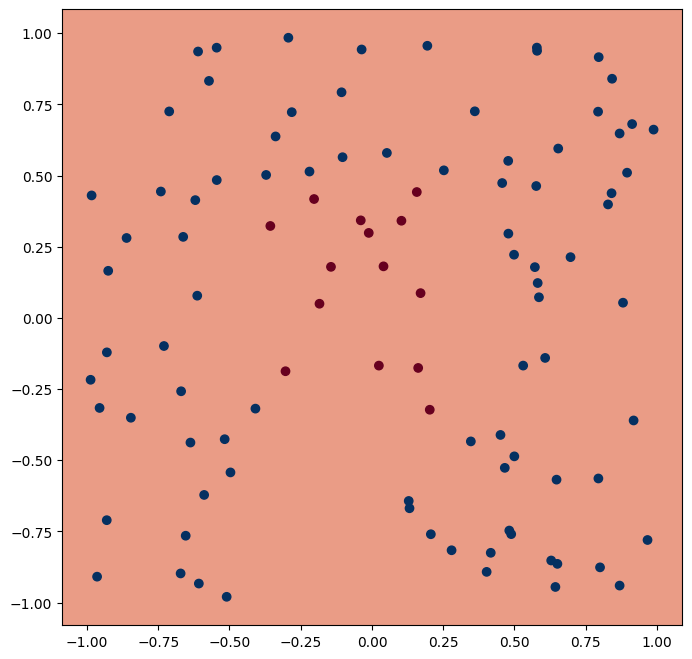

Accuracy: 0.00


In [88]:
# Generate data for a non-linearly separable problem.
X, y = generate_data_nls()

# Create a preceptron with the step activation function.
preceptron = Preceptron(2, step)

# Fit the model to the data.
preceptron.fit(X, y, max_epochs=1000, lr=0.5)

# Plot the data and the decision boundary.
plot_decision_boundary(preceptron, X, y)

# Score the model on the data.
print(f"Accuracy: {preceptron.score(X, y):.2f}")